In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime
import os
from glob import glob
import pathlib
color_list =["#3eb991","#e9a820","#e01563","#edb196","#6ecadc","#1f94ac","#ae9a6a","#ccb8a6","#343a44"]


# Graphing definition

In [93]:
def graph_df(data_frame:pd.DataFrame,begin_index=0,end_index=None):
    if end_index:
        column_name =list(data_frame.columns )[begin_index:end_index]
    else:
        column_name =list(data_frame.columns )[begin_index:]
    fig, ax = plt.subplots()
    x = np.arange(0, len(data_frame), step=1)

    for i in range(len(column_name)):
        label = column_name[i]
        #ax.scatter(x,test_output[label],color = color_list[i])
        ax.plot(x,data_frame[label])
        
    colorlist = zip(column_name,color_list)
    handles = [mpatches.Patch(color=colour, label=column_name) for label, colour in colorlist]
    t = ",".join(column_name)
    plt.legend(handles, column_name, ncol=1, bbox_to_anchor=(1, 1))
    plt.plot()
    ax.set_title(t)
    plt.tight_layout()


# Graphing Propogation

,0.4,0.4.1,0.4.2,0.4.3,0.4.4,0.4.5,0.4.6,0.4.7,0.4.8,0.4.9,...,0.4.90,0.4.91,0.4.92,0.4.93,0.4.94,0.4.95,0.4.96,0.4.97,0.4.98,0.4.99
0,0.498000,0.498000,0.498000,0.498000,0.498000,0.498000,0.498000,0.498000,0.498000,0.498000,...,0.498000,0.498000,0.498000,0.498000,0.498000,0.498000,0.498000,0.498000,0.498000,0.498000
1,0.620499,0.620249,0.620000,0.619753,0.619506,0.619261,0.619017,0.618775,0.618533,0.618293,...,0.602344,0.602185,0.602027,0.601869,0.601712,0.601556,0.601401,0.601246,0.601093,0.600940
2,0.765038,0.764504,0.763973,0.763445,0.762919,0.762396,0.761875,0.761357,0.760841,0.760328,...,0.726081,0.725738,0.725396,0.725056,0.724718,0.724381,0.724046,0.723712,0.723380,0.723050
3,0.909046,0.908327,0.907612,0.906899,0.906189,0.905481,0.904777,0.904076,0.903377,0.902681,...,0.855088,0.854600,0.854113,0.853629,0.853147,0.852667,0.852189,0.851713,0.851240,0.850769
4,1.006320,1.005720,1.005110,1.004500,1.003900,1.003290,1.002690,1.002090,1.001490,1.000890,...,0.957045,0.956566,0.956089,0.955613,0.955139,0.954666,0.954195,0.953726,0.953258,0.952792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.000028,-0.000028,-0.000027,-0.000026,-0.000025,-0.000024,-0.000023,-0.000023,-0.000022,-0.000021,...,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007
496,-0.000027,-0.000027,-0.000026,-0.000025,-0.000024,-0.000023,-0.000023,-0.000022,-0.000021,-0.000021,...,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007
497,-0.000026,-0.000026,-0.000025,-0.000024,-0.000023,-0.000022,-0.000022,-0.000021,-0.000020,-0.000020,...,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000006,-0.000006,-0.000006
498,-0.000025,-0.000025,-0.000024,-0.000023,-0.000022,-0.000022,-0.000021,-0.000020,-0.000020,-0.000019,...,-0.000007,-0.000007,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006


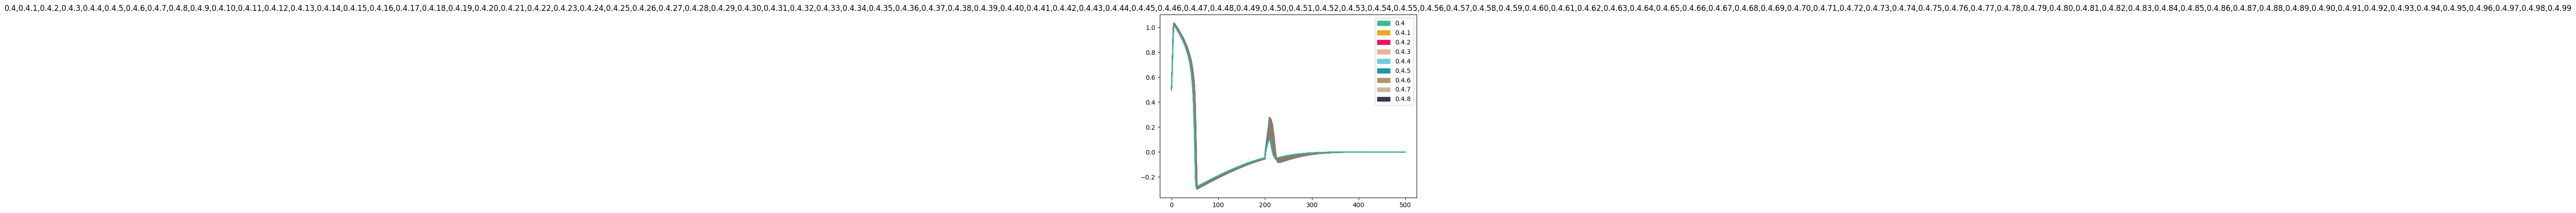

In [94]:
propogate_ap_df = pd.DataFrame(pd.read_csv("../data_files/reduced2dV_output.csv"))
display(propogate_ap_df)
graph_df(propogate_ap_df,0,len(propogate_ap_df))


In [95]:
def graph_time_frame(data_frame,time_frame):
    row1 = data_frame.iloc[time_frame]
    x = np.arange(0,len(row1),step = 1)
    fig, ax = plt.subplots()
    ax.plot(x,row1)
    ax.set_xlabel("axon location")
    ax.set_ylabel("V")
    ax.set_title(f"time: {time_frame}")
    ax.set_ylim(-0.5,1.2)
    plt.plot()
    plt.tight_layout()
    plt.savefig(f"../graphs/2D/{time_frame}")
    plt.close() 

In [96]:
graph_time_frame(propogate_ap_df,20)

In [97]:
os.makedirs("../graphs/2D", exist_ok=True)

old_files = glob("../graphs/2D/*.png")
for f in old_files:
    os.remove(f)

In [98]:
for i in range(len(propogate_ap_df)): 
    graph_time_frame(propogate_ap_df,i)

In [99]:
now = datetime.now()
current_time = now.strftime("%H_%M")
print(current_time)
os.system(
                "convert -delay 1 -loop 0 $(ls -1 ../graphs/2D/*.png | sort -V) -quality 95 ../vid/{}_{}.mp4".format("propagation",current_time))

17_08


0